### Find similar trend features
This notebook is used for finding biomarkers groups in the PLCO dataset that has similar performance changing trends when having different imbalance ratios. The model used could be simple as a single decision tree to reduce calculation and iteration time. The ratio could be varying from 1 to 5 for graph purposes. Two effects are preferably illustrated:
1. Two sets of biomarkers both do not have a high variance in performance as the ratio changes; 
2. Another set of biomarker that has decreased model performance as the ratio increases. 

In [1]:
from common_base import read_data
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [3]:
PLCO = read_data("../../csv_files/PLCO.csv")
PLCO = PLCO.dropna()
case, non_case = PLCO[PLCO["is_case"]==1], PLCO[PLCO["is_case"]==0]

In [24]:
columns = PLCO.drop(["is_case"], axis=1).columns

In [10]:
a_group = ['panela_leptin','panela_prolactin','panela_opn','panela_igf_ii','panela_mif','panela_ca_125']+["is_case"]
b_group = ['panelb_ca15_3','panelb_ca19_9','panelb_ca72_4','panelb_klk6','panelb_he4','panelb_ov_110']+["is_case"]
c_group = ["panela_leptin", "panela_prolactin", "panela_opn", "panela_igf_ii", "panela_mif"]+["is_case"]
d_group = ["paneld_b2m", "paneld_apo", "panele_eotaxin", "panele_mmp_3", "panele_egfr"]+["is_case"]

In [13]:
# Group A
# Split positive and negative
pos_a = case[a_group]
neg_a = non_case[a_group]

total_results_a = []
for ratio in range(1, 6):
    repeat_results_a = []
    for i in range(0, 30):
        clf_a = RandomForestClassifier()
        random_neg = neg_a.sample(frac=1)
        random_neg = random_neg.iloc[:len(pos_a)*ratio]
        random_dataset = pd.concat([pos_a, random_neg])
        x, y = random_dataset.drop(["is_case"], axis=1), random_dataset["is_case"]
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
        clf_a.fit(x_train, y_train)
        y_pred = clf_a.predict(x_test)
        repeat_results_a.append(roc_auc_score(y_test, y_pred))
    total_results_a.append(repeat_results_a)


In [14]:
# Group B
# Split positive and negative
pos_b = case[b_group]
neg_b = non_case[b_group]

total_results_b = []
for ratio in range(1, 6):
    repeat_results_b = []
    for i in range(0, 30):
        clf_b = RandomForestClassifier()
        random_neg = neg_b.sample(frac=1)
        random_neg = random_neg.iloc[:len(pos_b)*ratio]
        random_dataset = pd.concat([pos_b, random_neg])
        x, y = random_dataset.drop(["is_case"], axis=1), random_dataset["is_case"]
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
        clf_b.fit(x_train, y_train)
        y_pred = clf_b.predict(x_test)
        repeat_results_b.append(roc_auc_score(y_test, y_pred))
    total_results_b.append(repeat_results_b)


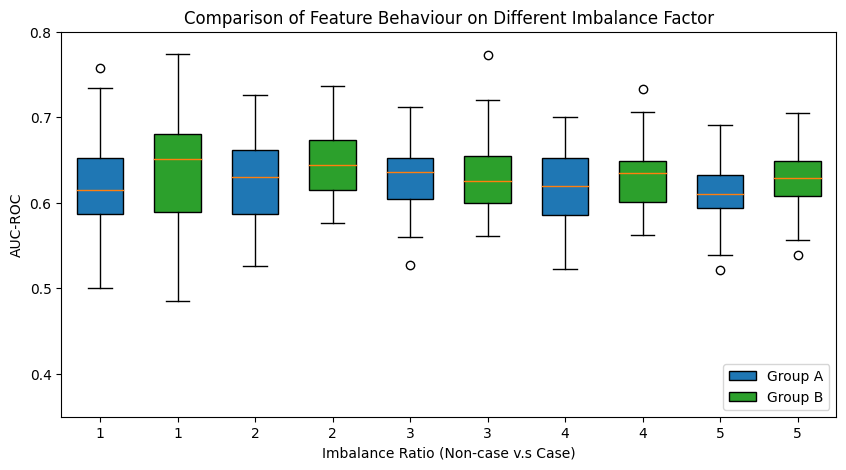

In [23]:
# Box plot A & B
fig, ax = plt.subplots(figsize=(10, 5))
bp_a = ax.boxplot(total_results_a, positions=range(1,10,2), widths=0.6, 
                 patch_artist=True, boxprops=dict(facecolor="C0"), labels=["1", "2", "3", "4", "5"])

bp_b = ax.boxplot(total_results_b, positions=range(2,11,2), widths=0.6, 
                 patch_artist=True, boxprops=dict(facecolor="C2"), labels=["1", "2", "3", "4", "5"])
ax.legend([bp_a["boxes"][0], bp_b["boxes"][0]], 
          ["Group A", "Group B"], loc="lower right")
plt.xlabel("Imbalance Ratio (Non-case v.s Case)")
plt.ylabel("AUC-ROC")
plt.ylim(0.35, 0.8)
plt.title("Comparison of Feature Behaviour on Different Imbalance Factor")
plt.show()

In [16]:
# Group C
# Split positive and negative
pos_c = case[c_group]
neg_c = non_case[c_group]

total_results_c = []
for ratio in range(1, 6):
    repeat_results_c = []
    for i in range(0, 30):
        clf_c = RandomForestClassifier()
        random_neg = neg_c.sample(frac=1)
        random_neg = random_neg.iloc[:len(pos_c)*ratio]
        random_dataset = pd.concat([pos_c, random_neg])
        x, y = random_dataset.drop(["is_case"], axis=1), random_dataset["is_case"]
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
        clf_c.fit(x_train, y_train)
        y_pred = clf_c.predict(x_test)
        repeat_results_c.append(roc_auc_score(y_test, y_pred))
    total_results_c.append(repeat_results_c)


In [17]:
# Group D
# Split positive and negative
pos_d = case[d_group]
neg_d = non_case[d_group]

total_results_d = []
for ratio in range(1, 6):
    repeat_results_d = []
    for i in range(0, 30):
        clf_d = RandomForestClassifier()
        random_neg = neg_d.sample(frac=1)
        random_neg = random_neg.iloc[:len(pos_d)*ratio]
        random_dataset = pd.concat([pos_d, random_neg])
        x, y = random_dataset.drop(["is_case"], axis=1), random_dataset["is_case"]
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
        clf_d.fit(x_train, y_train)
        y_pred = clf_d.predict(x_test)
        repeat_results_d.append(roc_auc_score(y_test, y_pred))
    total_results_d.append(repeat_results_d)


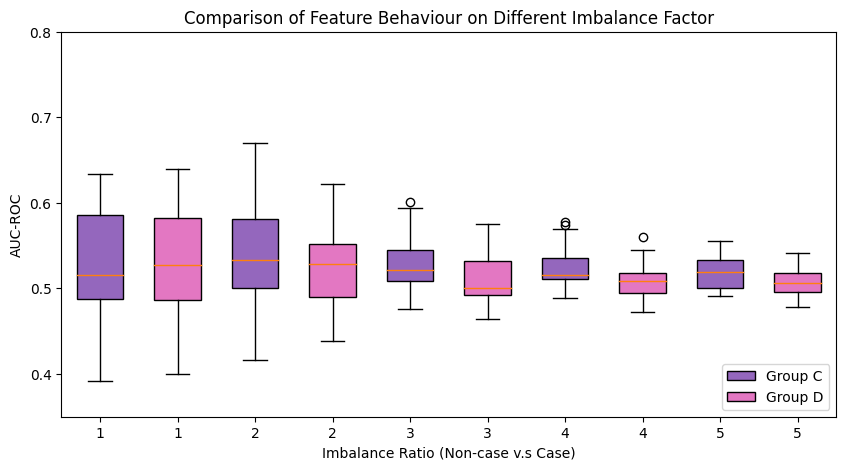

In [22]:
# Box plot C & D
fig, ax = plt.subplots(figsize=(10, 5))
bp_c = ax.boxplot(total_results_c, positions=range(1,10,2), widths=0.6, 
                 patch_artist=True, boxprops=dict(facecolor="C4"), labels=["1", "2", "3", "4", "5"])

bp_d = ax.boxplot(total_results_d, positions=range(2,11,2), widths=0.6, 
                 patch_artist=True, boxprops=dict(facecolor="C6"), labels=["1", "2", "3", "4", "5"])
ax.legend([bp_c["boxes"][0], bp_d["boxes"][0]], 
          ["Group C", "Group D"], loc="lower right")
plt.xlabel("Imbalance Ratio (Non-case v.s Case)")
plt.ylabel("AUC-ROC")
plt.ylim(0.35, 0.8)
plt.title("Comparison of Feature Behaviour on Different Imbalance Factor")
plt.show()

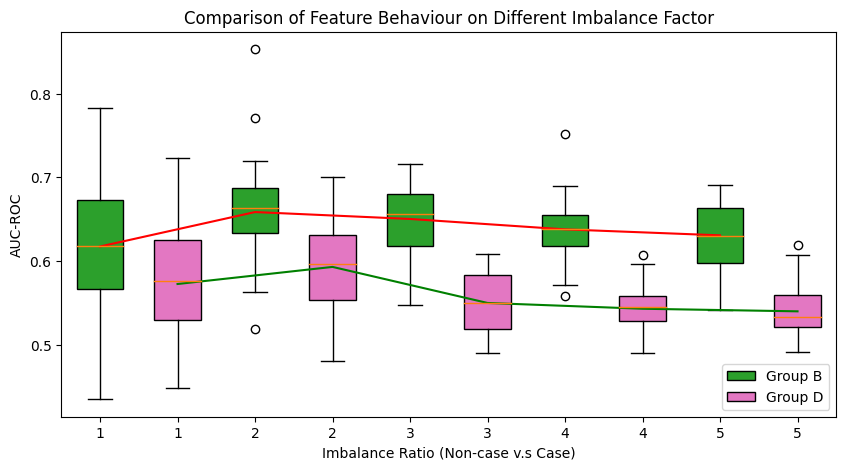

In [16]:
# Box plot A & B
fig, ax = plt.subplots(figsize=(10, 5))
bp_b = ax.boxplot(total_results_b, positions=range(1, 10, 2), widths=0.6, 
                 patch_artist=True, boxprops=dict(facecolor="C2"), labels=["1", "2", "3", "4", "5"])

bp_d = ax.boxplot(total_results_d, positions=range(2, 11, 2), widths=0.6, 
                 patch_artist=True, boxprops=dict(facecolor="C6"), labels=["1", "2", "3", "4", "5"])
ax.legend([bp_b["boxes"][0], bp_d["boxes"][0]], 
          ["Group B", "Group D"], loc="lower right")
plt.xlabel("Imbalance Ratio (Non-case v.s Case)")
plt.ylabel("AUC-ROC")
plt.title("Comparison of Feature Behaviour on Different Imbalance Factor")
plt.plot(range(1, 10, 2), [sum(b)/len(b) for b in total_results_b], color="red")
plt.plot(range(2, 11, 2), [sum(b)/len(b) for b in total_results_d], color="green")
plt.show()